**EDA** | *Exploratory Data Analysis* (Análisis exploratorio de Datos)

Los datos para este análisis fueron obtenidos del Catálogo de Datos Abiertos de Uruguay: https://catalogodatos.gub.uy/dataset/miem-remuneraciones


---

#### Introducción

Con el conjunto de datos de "Sistema de remuneraciones de los funcionarios del MIEM" (Ministerio de Industria, Energía y Minería), se intenta compartir los comandos básicos (utilizando Python | Google Colab) para realizar un análisis exploratorio sencillo, respondiendo algunas preguntas como:

> 1 - `Remuneración mínima`

> 2 - `Remuneración máxima`

> 3 - `Total de remuneraciones del MIEM en período (2022)`

> 4 - `Total de remuneraciones por tipo de cargo`

> 5 - `Cuál es el tipo de cargo con MENOR remuneración acumulada del período?`

> 6 - `Cuál es el tipo de cargo con MAYOR remuneración acumulada del período?`


Exploraremos el dataframe para saber si es necesario realizar algún proceso de limpieza y reparación de datos, ante de comenzar a responder nuestras preguntas




Librerías

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Lectura del dataset

In [34]:
rem = pd.read_excel('remuneraciones-miem-2022.xlsx')

Visualización del dataframe "rem" para chequear que quedó bien

In [ ]:
rem.head() # 5 primeras filas

,OID,Tipo Organismo,INCISO,UE,Nombre Inciso,Nombre UE,Nombre Organismo,DENOMINACIÓN DEL CARGO,ESCALAFON,GRADO,2022
0,2.16.858.0.0.0.1.1.9.0,Ministerio,8,S/D,"Ministerio de Industria, Energía y Minería",S/D,"Ministerio de Industria, Energía y Minería",Ministro de Estado,P,S/D,309439.71
1,2.16.858.0.0.0.1.1.9.0,Ministerio,8,S/D,"Ministerio de Industria, Energía y Minería",S/D,"Ministerio de Industria, Energía y Minería",Subsecretario de Estado,P,S/D,263023.75
2,2.16.858.0.0.0.1.1.9.0,Ministerio,8,S/D,"Ministerio de Industria, Energía y Minería",S/D,"Ministerio de Industria, Energía y Minería",Director General de Secretaría,Q,S/D,216607.80
3,2.16.858.0.0.0.1.1.9.0,Ministerio,8,S/D,"Ministerio de Industria, Energía y Minería",S/D,"Ministerio de Industria, Energía y Minería",Jefe de Política Económica,Q,S/D,127737.78
4,2.16.858.0.0.0.1.1.9.0,Ministerio,8,S/D,"Ministerio de Industria, Energía y Minería",S/D,"Ministerio de Industria, Energía y Minería",Director Nacional,Q,S/D,185663.83


In [ ]:
rem.tail() # 5 últimas filas

,OID,Tipo Organismo,INCISO,UE,Nombre Inciso,Nombre UE,Nombre Organismo,DENOMINACIÓN DEL CARGO,ESCALAFON,GRADO,2022
63,2.16.858.0.0.0.1.1.9.0,Ministerio,8,S/D,"Ministerio de Industria, Energía y Minería",S/D,"Ministerio de Industria, Energía y Minería",Auxiliar III,F,6,59300.81
64,2.16.858.0.0.0.1.1.9.0,Ministerio,8,S/D,"Ministerio de Industria, Energía y Minería",S/D,"Ministerio de Industria, Energía y Minería",Adscripto al Ministro,S/D,S/D,130625.03
65,2.16.858.0.0.0.1.1.9.0,Ministerio,8,S/D,"Ministerio de Industria, Energía y Minería",S/D,"Ministerio de Industria, Energía y Minería",Adscripto al Ministro,S/D,S/D,134149.64
66,2.16.858.0.0.0.1.1.9.0,Ministerio,8,S/D,"Ministerio de Industria, Energía y Minería",S/D,"Ministerio de Industria, Energía y Minería",Adscripto al Ministro,S/D,S/D,150918.06
67,2.16.858.0.0.0.1.1.9.0,Ministerio,8,S/D,"Ministerio de Industria, Energía y Minería",S/D,"Ministerio de Industria, Energía y Minería",Adscripto al Ministro,S/D,S/D,101716.20


Obtener información inicial del set de datos

In [ ]:
rem.iloc[0] # Primera fila

OID                                           2.16.858.0.0.0.1.1.9.0
Tipo Organismo                                            Ministerio
INCISO                                                             8
UE                                                               S/D
Nombre Inciso             Ministerio de Industria, Energía y Minería
Nombre UE                                                        S/D
Nombre Organismo          Ministerio de Industria, Energía y Minería
DENOMINACIÓN DEL CARGO                            Ministro de Estado
ESCALAFON                                                          P
GRADO                                                            S/D
2022                                                       309439.71
Name: 0, dtype: object

In [ ]:
rem.iloc[1] # Segunda fila

OID                                           2.16.858.0.0.0.1.1.9.0
Tipo Organismo                                            Ministerio
INCISO                                                             8
UE                                                               S/D
Nombre Inciso             Ministerio de Industria, Energía y Minería
Nombre UE                                                        S/D
Nombre Organismo          Ministerio de Industria, Energía y Minería
DENOMINACIÓN DEL CARGO                       Subsecretario de Estado
ESCALAFON                                                          P
GRADO                                                            S/D
2022                                                       263023.75
Name: 1, dtype: object

In [ ]:
rem.iloc[-1] # última fila

OID                                           2.16.858.0.0.0.1.1.9.0
Tipo Organismo                                            Ministerio
INCISO                                                             8
UE                                                               S/D
Nombre Inciso             Ministerio de Industria, Energía y Minería
Nombre UE                                                        S/D
Nombre Organismo          Ministerio de Industria, Energía y Minería
DENOMINACIÓN DEL CARGO                         Adscripto al Ministro
ESCALAFON                                                        S/D
GRADO                                                            S/D
2022                                                        101716.2
Name: 67, dtype: object

In [ ]:
rem.iloc[[0,2,1]]  # Primera, segunda y tercera filas

,OID,Tipo Organismo,INCISO,UE,Nombre Inciso,Nombre UE,Nombre Organismo,DENOMINACIÓN DEL CARGO,ESCALAFON,GRADO,2022
0,2.16.858.0.0.0.1.1.9.0,Ministerio,8,S/D,"Ministerio de Industria, Energía y Minería",S/D,"Ministerio de Industria, Energía y Minería",Ministro de Estado,P,S/D,309439.71
2,2.16.858.0.0.0.1.1.9.0,Ministerio,8,S/D,"Ministerio de Industria, Energía y Minería",S/D,"Ministerio de Industria, Energía y Minería",Director General de Secretaría,Q,S/D,216607.80
1,2.16.858.0.0.0.1.1.9.0,Ministerio,8,S/D,"Ministerio de Industria, Energía y Minería",S/D,"Ministerio de Industria, Energía y Minería",Subsecretario de Estado,P,S/D,263023.75


In [ ]:
rem.iloc[:, [6,7,10]]  # Sexta, séptima y décima columnas

,Nombre Organismo,DENOMINACIÓN DEL CARGO,2022
0,"Ministerio de Industria, Energía y Minería",Ministro de Estado,309439.71
1,"Ministerio de Industria, Energía y Minería",Subsecretario de Estado,263023.75
2,"Ministerio de Industria, Energía y Minería",Director General de Secretaría,216607.80
3,"Ministerio de Industria, Energía y Minería",Jefe de Política Económica,127737.78
4,"Ministerio de Industria, Energía y Minería",Director Nacional,185663.83
...,...,...,...
63,"Ministerio de Industria, Energía y Minería",Auxiliar III,59300.81
64,"Ministerio de Industria, Energía y Minería",Adscripto al Ministro,130625.03
65,"Ministerio de Industria, Energía y Minería",Adscripto al Ministro,134149.64
66,"Ministerio de Industria, Energía y Minería",Adscripto al Ministro,150918.06


In [ ]:
# El método nunique() devuelve el número de valores únicos para cada columna. 
# Al especificar el eje de la columna ( axis='columns' ), ​​el método nunique() busca por columnas y devuelve el número de valores únicos para cada fila.

In [ ]:
rem.nunique()

OID                        1
Tipo Organismo             1
INCISO                     1
UE                         1
Nombre Inciso              1
Nombre UE                  1
Nombre Organismo           1
DENOMINACIÓN DEL CARGO    54
ESCALAFON                 10
GRADO                     16
2022                      24
dtype: int64

In [ ]:
rem.iloc[:, 0] # Primera columna

0     2.16.858.0.0.0.1.1.9.0
1     2.16.858.0.0.0.1.1.9.0
2     2.16.858.0.0.0.1.1.9.0
3     2.16.858.0.0.0.1.1.9.0
4     2.16.858.0.0.0.1.1.9.0
               ...          
63    2.16.858.0.0.0.1.1.9.0
64    2.16.858.0.0.0.1.1.9.0
65    2.16.858.0.0.0.1.1.9.0
66    2.16.858.0.0.0.1.1.9.0
67    2.16.858.0.0.0.1.1.9.0
Name: OID, Length: 68, dtype: object

In [ ]:
rem.iloc[:, 1] # Segunda columna

0     Ministerio
1     Ministerio
2     Ministerio
3     Ministerio
4     Ministerio
         ...    
63    Ministerio
64    Ministerio
65    Ministerio
66    Ministerio
67    Ministerio
Name: Tipo Organismo, Length: 68, dtype: object

In [ ]:
rem.iloc[:, -1] # Última columna

0     309439.71
1     263023.75
2     216607.80
3     127737.78
4     185663.83
        ...    
63     59300.81
64    130625.03
65    134149.64
66    150918.06
67    101716.20
Name: 2022, Length: 68, dtype: float64

In [ ]:
rem.isnull() # Buscar valores faltantes

,OID,Tipo Organismo,INCISO,UE,Nombre Inciso,Nombre UE,Nombre Organismo,DENOMINACIÓN DEL CARGO,ESCALAFON,GRADO,2022
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
63,False,False,False,False,False,False,False,False,False,False,False
64,False,False,False,False,False,False,False,False,False,False,False
65,False,False,False,False,False,False,False,False,False,False,False
66,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
rem.isnull().sum() # Encontrar número de valores faltantes para cada columna

OID                       0
Tipo Organismo            0
INCISO                    0
UE                        0
Nombre Inciso             0
Nombre UE                 0
Nombre Organismo          0
DENOMINACIÓN DEL CARGO    0
ESCALAFON                 0
GRADO                     0
2022                      0
dtype: int64

Búsqueda de entradas de datos incorrectas

In [ ]:
for x in rem.columns:
    if rem[x].dtype == 'object':
        print("Nombre de columna:", x)
        print(rem[x].value_counts())
        print("-------------------------")

Nombre de columna: OID
2.16.858.0.0.0.1.1.9.0    68
Name: OID, dtype: int64
-------------------------
Nombre de columna: Tipo Organismo
Ministerio    68
Name: Tipo Organismo, dtype: int64
-------------------------
Nombre de columna: UE
S/D    68
Name: UE, dtype: int64
-------------------------
Nombre de columna: Nombre Inciso
Ministerio de Industria, Energía y Minería    68
Name: Nombre Inciso, dtype: int64
-------------------------
Nombre de columna: Nombre UE
S/D    68
Name: Nombre UE, dtype: int64
-------------------------
Nombre de columna: Nombre Organismo
Ministerio de Industria, Energía y Minería    68
Name: Nombre Organismo, dtype: int64
-------------------------
Nombre de columna: DENOMINACIÓN DEL CARGO
Adscripto al Ministro                              4
Administrativo                                     4
Asesor III                                         3
Oficial V                                          2
Especialista III                                   2
Administrativ

Alguna información mas:

In [ ]:
print(' - Cantidad de Filas y columnas:', rem.shape, '\n')

print(' - Nombre columnas:',rem.columns, '\n')

print(' - Información del dataframe rem:\n')
rem.info()

 - Cantidad de Filas y columnas: (68, 11) 

 - Nombre columnas: Index([                   'OID',         'Tipo Organismo',
                       'INCISO',                     'UE',
                'Nombre Inciso',              'Nombre UE',
             'Nombre Organismo', 'DENOMINACIÓN DEL CARGO',
                    'ESCALAFON',                  'GRADO',
                           2022],
      dtype='object') 

 - Información del dataframe rem:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   OID                     68 non-null     object 
 1   Tipo Organismo          68 non-null     object 
 2   INCISO                  68 non-null     int64  
 3   UE                      68 non-null     object 
 4   Nombre Inciso           68 non-null     object 
 5   Nombre UE               68 non-null     object 
 6   Nombre Organismo

In [ ]:
rem.duplicated().value_counts # Buscar duplicados

<bound method IndexOpsMixin.value_counts of 0     False
1     False
2     False
3     False
4     False
      ...  
63    False
64    False
65    False
66    False
67    False
Length: 68, dtype: bool>

In [ ]:
rem.describe() # Cálculo de datos estadísticos de las columnas numéricas (No muestra la información de las columnas categóricas)

,INCISO,2022
count,68.0,68.000000
mean,8.0,83312.859412
std,0.0,48059.502381
min,8.0,52823.660000
25%,8.0,61627.390000
50%,8.0,68360.240000
75%,8.0,78224.710000
max,8.0,309439.710000


In [ ]:
rem[2022].describe() # cálculo de datos estadísticos, descripción de una sola columna
# > 1 - Remuneración mínima
# > 2 - Remuneración máxima

count        68.000000
mean      83312.859412
std       48059.502381
min       52823.660000
25%       61627.390000
50%       68360.240000
75%       78224.710000
max      309439.710000
Name: 2022, dtype: float64

In [ ]:
# Cambio de nombre de columnas: Nombre Organismo, DENOMINACIÓN DEL CARGO y 2022
rem.rename(columns={'Nombre Organismo': 'Organismo', 'DENOMINACIÓN DEL CARGO':'Cargo',
                        2022:'Montos_2022'},
               inplace=True)
rem.columns

Index(['OID', 'Tipo Organismo', 'INCISO', 'UE', 'Nombre Inciso', 'Nombre UE',
       'Organismo', 'Cargo', 'ESCALAFON', 'GRADO', 'Montos_2022'],
      dtype='object')

In [ ]:
# Cambio de todos los encabezados de columnas a minúsculas
rem.columns = map(str.lower, rem.columns)
rem.columns

Index(['oid', 'tipo organismo', 'inciso', 'ue', 'nombre inciso', 'nombre ue',
       'organismo', 'cargo', 'escalafon', 'grado', 'montos_2022'],
      dtype='object')

In [ ]:
# Cambio de todos los encabezados de columnas a mayúsculas
rem.columns = map(str.upper, rem.columns)
rem.columns

Index(['OID', 'TIPO ORGANISMO', 'INCISO', 'UE', 'NOMBRE INCISO', 'NOMBRE UE',
       'ORGANISMO', 'CARGO', 'ESCALAFON', 'GRADO', 'MONTOS_2022'],
      dtype='object')

In [ ]:
# Cantidad de registros agrupados por escalafón
rem_agrup_esc = rem.groupby('ESCALAFON').count()
rem_agrup_esc

,OID,TIPO ORGANISMO,INCISO,UE,NOMBRE INCISO,NOMBRE UE,ORGANISMO,CARGO,GRADO,MONTOS_2022
ESCALAFON,,,,,,,,,,
A,11,11,11,11,11,11,11,11,11,11
B,8,8,8,8,8,8,8,8,8,8
C,21,21,21,21,21,21,21,21,21,21
CO3,1,1,1,1,1,1,1,1,1,1
D,9,9,9,9,9,9,9,9,9,9
E,7,7,7,7,7,7,7,7,7,7
F,2,2,2,2,2,2,2,2,2,2
P,2,2,2,2,2,2,2,2,2,2
Q,3,3,3,3,3,3,3,3,3,3


In [ ]:
# Agrupo y sumo a partir de la columna Año 2022
# > 4 - Total de remuneraciones por tipo de cargo

In [ ]:
rem_agrup_cargo = rem.groupby('CARGO').agg({'MONTOS_2022': 'sum'})
rem_agrup_cargo.head()

,MONTOS_2022
CARGO,
Administrativo,253670.73
Administrativo I,128229.12
Administrativo II,63203.89
Administrativo III,120928.20
Administrativo IV,59300.81


In [ ]:
rem_agrup_cargo = rem_agrup_cargo.sort_values(by='MONTOS_2022') 
# podemos definir por el tipo de orden que necesitamos con ascending=False por ejemplo

In [ ]:
# > 5 - Cuál es el tipo de cargo con MENOR remuneración acumulada del período?
# > 6 - Cuál es el tipo de cargo con MAYOR remuneración acumulada del período?

rem_agrup_cargo

,MONTOS_2022
CARGO,
Oficial IX,52823.66
Especialista XIV,52823.66
Administrativo IX,52823.66
Administrativo VIII,52823.66
Administrativo XIV,52823.66
Oficial,52823.66
Técnico XII,55487.93
Asesor XII,56416.59
Administrativo VI,56416.59


In [ ]:
# > 3 - Total de remuneraciones del período 2022
print('Suma total de remuneraciones del período 2022:')
rem_agrup_cargo['MONTOS_2022'].sum()

Suma total de remuneraciones del período 2022:


5665274.44

Gráfico

Total de remuneraciones por cargo en 2022 



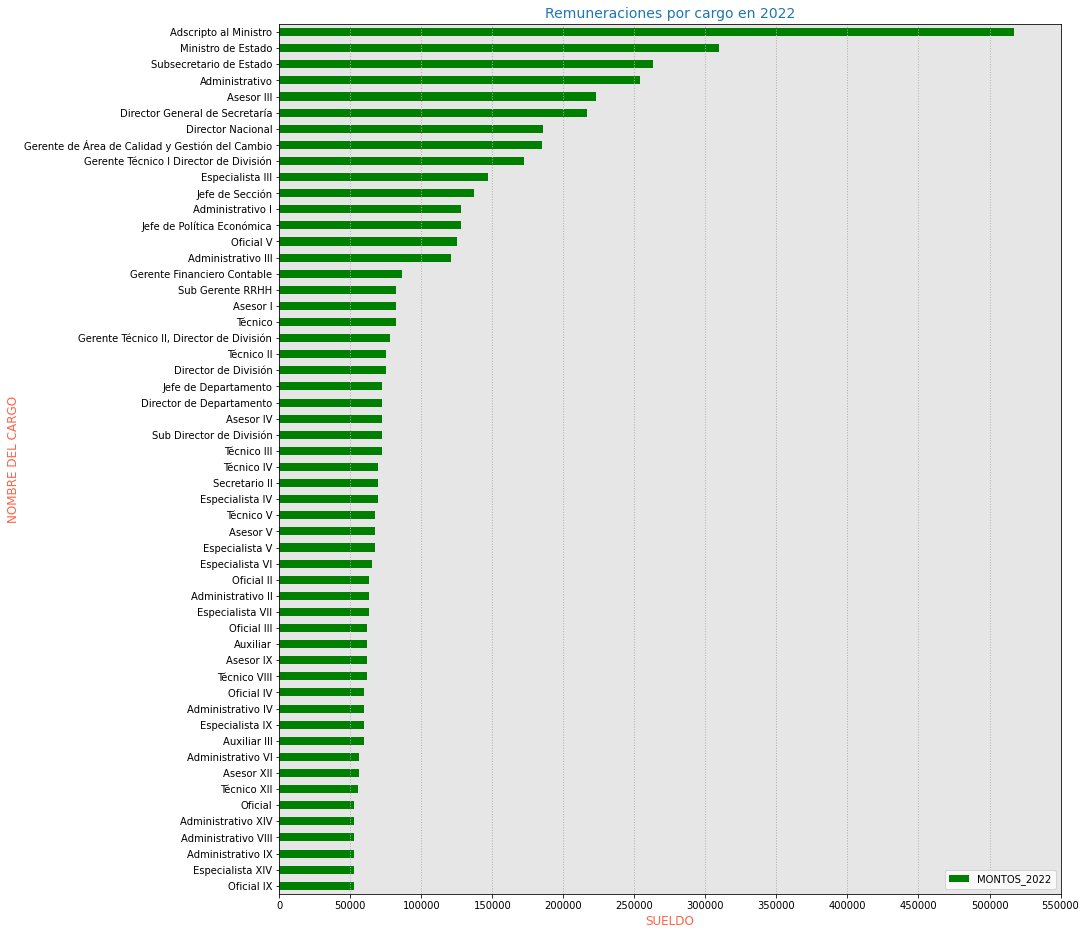

In [ ]:
rem_agrup_cargo.plot(kind='barh', figsize=(14,16), color='green')
plt.gca().set_facecolor('0.9')
plt.xticks(range(0, 600000, 50000))
plt.xlabel('SUELDO', fontsize=12).set_color('tomato')
plt.ylabel('NOMBRE DEL CARGO', fontsize=12).set_color('tomato')
plt.title('Remuneraciones por cargo en 2022', fontsize=14).set_color('C0')
plt.grid(axis='x', linestyle='dotted', linewidth=1)
print('Total de remuneraciones por cargo en 2022 \n')

Respuestas:

> Remuneración mínima: 52823.66

> Remuneración máxima: 309439.71

> Total de remuneraciones del MIEM en período (2022): 5665274.44

> Total de remuneraciones por tipo de cargo: detalle en cuaderno "rem_agrup_cargo"

> Cuál es el tipo de cargo con MENOR remuneración acumulada del período?: Oficial IX

> Cuál es el tipo de cargo con MAYOR remuneración acumulada del período?: Adscripto al Ministro

In [ ]:
 # Para poder realizar un pdf con la información completa, en otro cuaderno vamos autilizar el comando: !jupyter nbconvert --to html /content/remuneraciones_MIEM.ipynb
 # Desde el cuaderno nuevo subir el archivo .ipynb que queremos transformar en html para luego imprimirlo en pdf y ejecutar el comando